<a href="https://colab.research.google.com/github/jerry14771/Default-of-credit-card-clients/blob/main/Default_of_credit_card_clients_Capstone_Project_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn.model_selection import GridSearchCV as gsv
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
print(pd.__version__)

1.3.5


In [5]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 3.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [6]:
!pip3 install pandas --upgrade

In [7]:
df = pd.read_excel('/content/drive/MyDrive/Capstone Project- Credit Card Fraud/Copy of default of credit card clients.xls', index_col=None)

In [8]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [9]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [10]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [12]:
df.shape

(30000, 25)

In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [14]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [16]:
df.isna().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

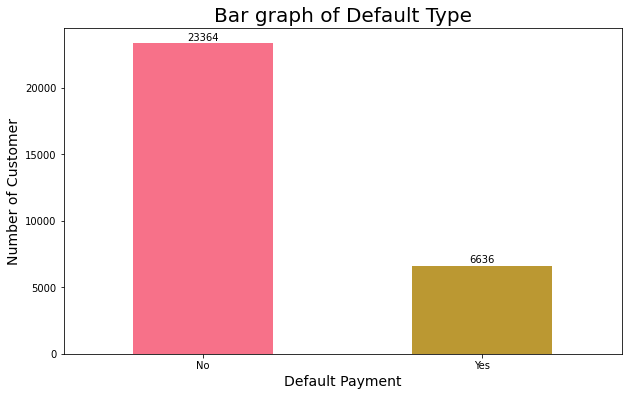

In [17]:
default_type = df['default payment next month'].value_counts()
plt.figure(figsize=(10, 6))
ax = default_type.plot(kind='bar', rot=0, color=sns.color_palette('husl'))
ax.set_title("Bar graph of Default Type", y = 1, fontsize=20)
plt.xlabel('Default Payment', fontsize=14)
plt.ylabel('Number of Customer', fontsize=14)
plt.xticks([0,1],['No','Yes'])

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

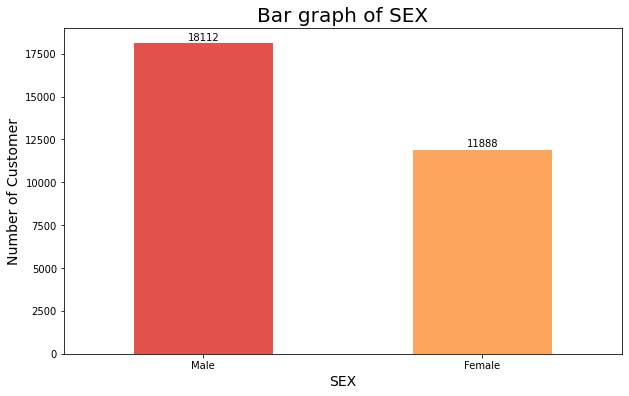

In [18]:
default_type = df['SEX'].value_counts()
plt.figure(figsize=(10, 6))
ax = default_type.plot(kind='bar', rot=0, color=sns.color_palette('Spectral'))
ax.set_title("Bar graph of SEX", y = 1, fontsize=20)
plt.xlabel('SEX', fontsize=14)
plt.ylabel('Number of Customer', fontsize=14)
plt.xticks([0,1],['Male','Female'])

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

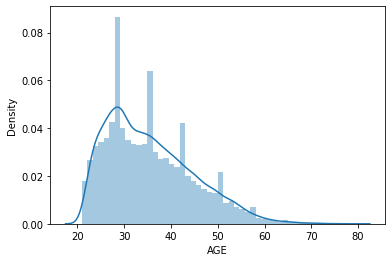

In [19]:
sns.distplot(df['AGE'])

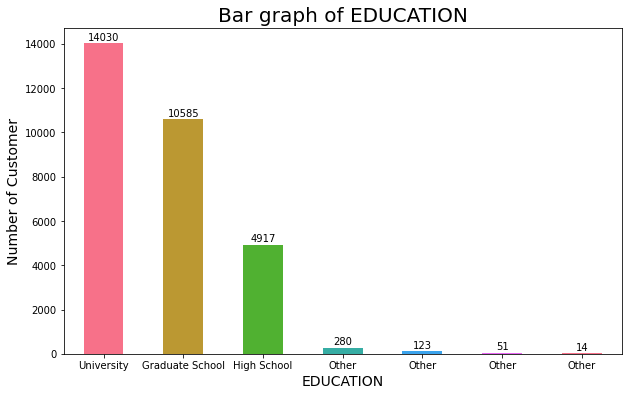

In [20]:
default_type = df['EDUCATION'].value_counts()
plt.figure(figsize=(10, 6))
ax = default_type.plot(kind='bar', rot=0, color=sns.color_palette('husl'))
ax.set_title("Bar graph of EDUCATION", y = 1, fontsize=20)
plt.xlabel('EDUCATION', fontsize=14)
plt.ylabel('Number of Customer', fontsize=14)
# 1 = graduate school; 2 = university; 3 = high school; 4 = others
plt.xticks([0,1,2,3,4,5,6],['University','Graduate School', 'High School', 'Other', 'Other', 'Other', 'Other'])

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

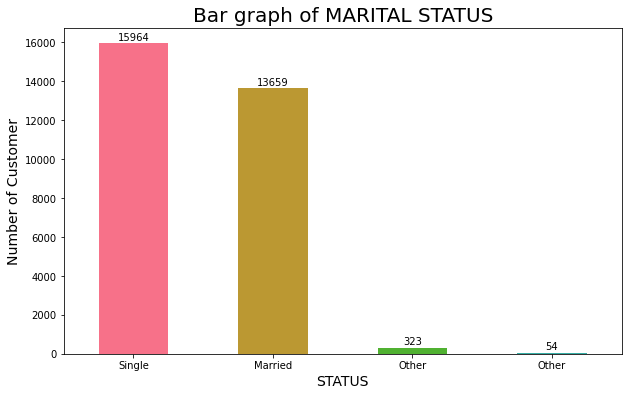

In [21]:
default_type = df['MARRIAGE'].value_counts()
plt.figure(figsize=(10, 6))
ax = default_type.plot(kind='bar', rot=0, color=sns.color_palette('husl'))
ax.set_title("Bar graph of MARITAL STATUS", y = 1, fontsize=20)
plt.xlabel('STATUS', fontsize=14)
plt.ylabel('Number of Customer', fontsize=14)
plt.xticks([0,1,2,3],['Single','Married','Other','Other'])

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

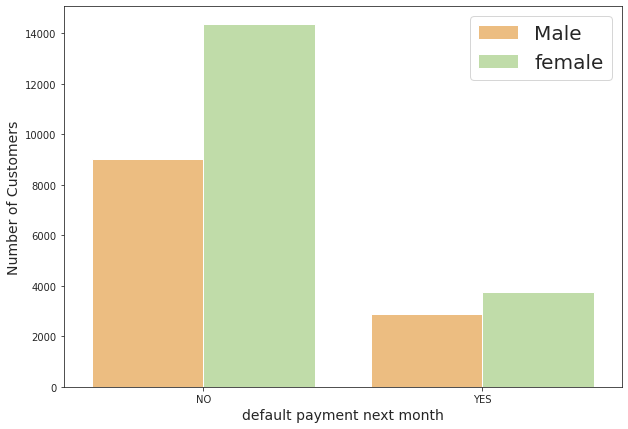

In [22]:
sns.set_style('ticks')
plt.figure(figsize=(10,7))
sns.countplot(data = df, x = 'default payment next month', hue='SEX', palette="Spectral")
plt.xlabel("default payment next month", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.xticks([0,1],['NO','YES'])
plt.legend(['Male','female'],prop={'size':20})

Text(0, 0.5, 'Number of Customers')

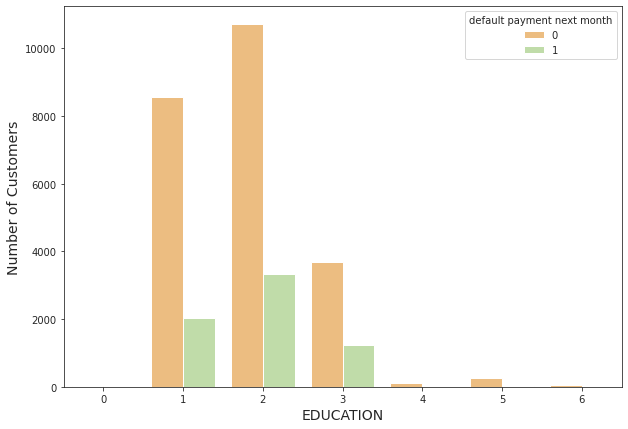

In [23]:
sns.set_style('ticks')
plt.figure(figsize=(10,7))
sns.countplot(data = df, x = 'EDUCATION', hue='default payment next month', palette="Spectral")
plt.xlabel("EDUCATION", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

#DATA PRE-PROCESSING

In [24]:
df=df.apply(pd.to_numeric)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [26]:
df.drop('ID', axis=1, inplace=True) #Dropping ID

In [27]:
list_of_columns=['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in list_of_columns:
  df[i]=df[i].apply(lambda x: 0 if x<0 else x)

In [28]:
df['MARRIAGE'] = df['MARRIAGE'].apply(lambda x: 3 if x==0 else x)

In [29]:
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 4 if x!=1 and x!=2 and x!=3 else x)

plotting heatmap to check Correlation

In [30]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,,,,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,1.000000,0.024755,-0.231088,-0.111012,0.144713,-0.170745,-0.197136,-0.191323,-0.180629,-0.170045,-0.167820,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.013627,-0.028522,-0.090874,-0.034475,-0.044750,-0.041227,-0.039737,-0.038533,-0.032061,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.231088,0.013627,1.000000,-0.136797,0.182434,0.055937,0.062739,0.053058,0.051209,0.039623,0.028670,0.016597,0.011980,0.006714,-0.006131,-0.012439,-0.012646,-0.041088,-0.032793,-0.044293,-0.040949,-0.045138,-0.044061,0.033842
MARRIAGE,-0.111012,-0.028522,-0.136797,1.000000,-0.412001,-0.011551,-0.009275,0.002556,-0.003029,-0.002497,0.002793,-0.027832,-0.025294,-0.029082,-0.027274,-0.029270,-0.025066,-0.004653,-0.009513,-0.004250,-0.013970,-0.003019,-0.008383,-0.027575
AGE,0.144713,-0.090874,0.182434,-0.412001,1.000000,-0.001447,-0.008774,-0.014266,-0.007288,-0.013277,-0.016948,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.170745,-0.034475,0.055937,-0.011551,-0.001447,1.000000,0.698389,0.516970,0.460224,0.424473,0.373805,-0.000819,0.009137,0.013307,0.022100,0.030731,0.030201,-0.079177,-0.057189,-0.062620,-0.061886,-0.053784,-0.048733,0.396019
PAY_2,-0.197136,-0.044750,0.062739,-0.009275,-0.008774,0.698389,1.000000,0.663529,0.512773,0.462717,0.407086,0.011684,0.015932,0.022950,0.032467,0.040422,0.042222,-0.097475,-0.054838,-0.059865,-0.053981,-0.048714,-0.043099,0.327093
PAY_3,-0.191323,-0.041227,0.053058,0.002556,-0.014266,0.516970,0.663529,1.000000,0.678931,0.551430,0.492827,-0.020586,-0.000968,0.002447,0.016579,0.026196,0.028979,-0.039356,-0.073670,-0.057702,-0.053849,-0.050805,-0.048443,0.286999
PAY_4,-0.180629,-0.039737,0.051209,-0.003029,-0.007288,0.460224,0.512773,0.678931,1.000000,0.745419,0.602875,-0.025184,-0.012569,0.002670,0.014654,0.027239,0.033138,-0.054484,-0.036877,-0.074064,-0.055305,-0.052732,-0.048828,0.269055


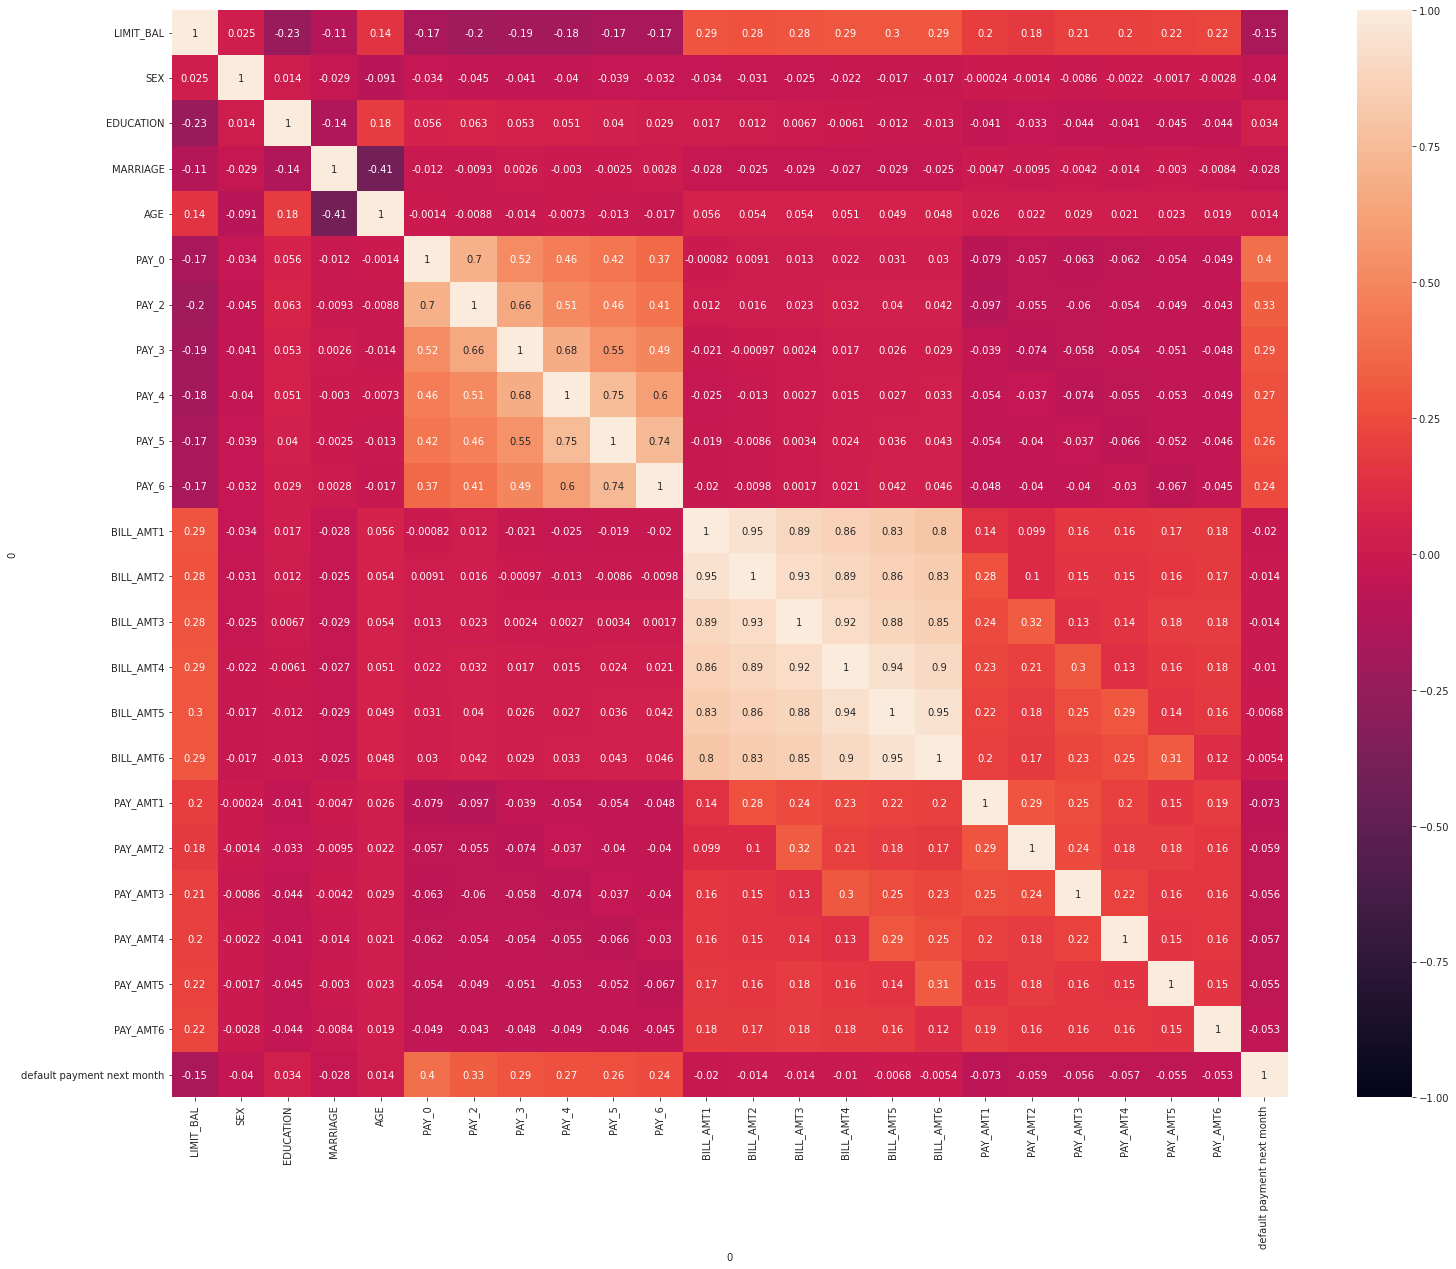

In [31]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True, vmin=-1.0)


In [32]:
dummies = pd.get_dummies(df['SEX'], prefix='Gender')
df=pd.concat([df,dummies], axis=1)
df.drop('SEX', axis=1, inplace=True)

In [33]:
dummies1 = pd.get_dummies(df['EDUCATION'], prefix='EDU')
df=pd.concat([df,dummies1], axis=1)
df.drop('EDUCATION', axis=1, inplace=True)

In [34]:
dummies2 = pd.get_dummies(df['MARRIAGE'], prefix='MARRY')
df=pd.concat([df,dummies2], axis=1)
df.drop('MARRIAGE', axis=1, inplace=True)

In [35]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Gender_1,Gender_2,EDU_1,EDU_2,EDU_3,EDU_4,MARRY_1,MARRY_2,MARRY_3
1,20000,24,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,1,0,0,1,0,0
2,120000,26,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,1,0,0,0,1,0
3,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,1,0,0,0,1,0
4,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,1,0,0,1,0,0
5,50000,57,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,1,0,0,1,0,0


#Seperate Dependent and Independent Variable

In [36]:
X=df[set(df.columns)-{'default payment next month'}]

In [37]:
col=list(df.columns)

In [38]:
col.remove('default payment next month')

In [39]:
Y=df['default payment next month']

In [40]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=[col])


In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, Y)

In [42]:
x_train,x_test,y_train,y_test = (train_test_split(x_smote,y_smote, test_size=0.2, random_state=3))

#Implementing Logistic Regression

In [43]:
# Logistic = LogisticRegression()
# Logistic.fit(x_train, y_train)
# y_pred = Logistic.predict(x_test)

In [44]:
# from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
# roc=roc_auc_score(y_test, y_pred) *100
# acc = accuracy_score(y_test, y_pred) *100
# prec = precision_score(y_test, y_pred) *100
# rec = recall_score(y_test, y_pred) *100
# f1 = f1_score(y_test, y_pred) *100

# results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
# print(results)

-----

#Hyper-Parameter Tuning in  Logistic Regression Model

In [45]:
# param_grid = [{'penalty': ['l1','l2','elasticnet','none'],
#                'max_iter': [100,500,5000],
#                'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#                'C' : [100, 10, 1.0, 0.1, 0.01]
#                }
#               ]
# Logistic1 = LogisticRegression()
# clf = gsv(Logistic1, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1,scoring='f1')
# best_clf = clf.fit(x_smote,y_smote)
# clf.best_params_

----------------

In [46]:
# BestLogistic = LogisticRegression(C = 0.01, max_iter= 100, penalty='l2', solver= 'liblinear')
# BestLogistic.fit(x_train,y_train)
# y_pred=BestLogistic.predict(x_test)

In [47]:
# from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
# roc=roc_auc_score(y_test, y_pred) *100
# acc = accuracy_score(y_test, y_pred) *100
# prec = precision_score(y_test, y_pred) *100
# rec = recall_score(y_test, y_pred) *100
# f1 = f1_score(y_test, y_pred) *100

# results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
# print(results)

-----------

#Random Forest Implementation

In [48]:
# Random = RandomForestClassifier()
# Random.fit(x_train,y_train)
# y_pred = Random.predict(x_test)

In [49]:
# roc=roc_auc_score(y_test, y_pred) *100
# acc = accuracy_score(y_test, y_pred) *100
# prec = precision_score(y_test, y_pred) *100
# rec = recall_score(y_test, y_pred) *100
# f1 = f1_score(y_test, y_pred) *100

# results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
# print(results)

#Random Forest (Cross-Validation and Hyper-Parameter tuning)

In [50]:
# param_grid=[{'n_estimators' : [100, 1000],'max_features' : ['sqrt', 'log2']}]
# Random1 = RandomForestClassifier()
# clf = gsv(Random1, param_grid=param_grid, cv=4, verbose=True, n_jobs=-1,scoring='f1')
# Best_fit1=clf.fit(x_smote,y_smote)
# clf.best_params_

-----------------------

In [51]:
# Best_Random1 = RandomForestClassifier(max_features= 'log2', n_estimators= 1000)
# Best_Random1.fit(x_train,y_train)
# y_pred = Best_Random1.predict(x_test)

In [52]:
# roc=roc_auc_score(y_test, y_pred) *100
# acc = accuracy_score(y_test, y_pred) *100
# prec = precision_score(y_test, y_pred) *100
# rec = recall_score(y_test, y_pred) *100
# f1 = f1_score(y_test, y_pred) *100

# results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
# print(results)

------------------------------------------------------------------

#KNN Implementation

In [53]:
# knn=KNeighborsClassifier()
# knn.fit(x_train,y_train)
# y_pred = knn.predict(x_test)

In [54]:
# roc=roc_auc_score(y_test, y_pred) *100
# acc = accuracy_score(y_test, y_pred) *100
# prec = precision_score(y_test, y_pred) *100
# rec = recall_score(y_test, y_pred) *100
# f1 = f1_score(y_test, y_pred) *100

# results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
# print(results)

#KNN with hyper-parameter tuning and cross validation

In [55]:
# param_grid=[{'n_neighbors' : range(1, 21, 2),'weights' : ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan', 'minkowski']}]
# knn1 = KNeighborsClassifier()
# clf = gsv(knn1, param_grid=param_grid, cv=4, verbose=True, n_jobs=-1,scoring='f1')
# Best_fit1=clf.fit(x_smote,y_smote)
# clf.best_params_

In [56]:
# y_pred = clf.predict(x_test)

In [57]:
# roc=roc_auc_score(y_test, y_pred) *100
# acc = accuracy_score(y_test, y_pred) *100
# prec = precision_score(y_test, y_pred) *100
# rec = recall_score(y_test, y_pred) *100
# f1 = f1_score(y_test, y_pred) *100

# results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
# print(results)

-------------

In [58]:
# knn2 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 1, weights= 'uniform')
# knn2.fit(x_train,y_train)
# y_pred=knn2.predict(x_test)

In [59]:
# roc=roc_auc_score(y_test, y_pred) *100
# acc = accuracy_score(y_test, y_pred) *100
# prec = precision_score(y_test, y_pred) *100
# rec = recall_score(y_test, y_pred) *100
# f1 = f1_score(y_test, y_pred) *100

# results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
#                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
# print(results)

------------------------

#XGBoost Algorithm

In [73]:
import xgboost as xgb

In [74]:
from xgboost import XGBClassifier

In [83]:
# fit model no training data
model = XGBClassifier(n_estimators=1500, eta=0.05)
model.fit(x_train, y_train)

XGBClassifier(eta=0.05, n_estimators=1500)

In [84]:
y_pred=model.predict(x_test)

In [81]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [85]:
roc=roc_auc_score(y_test, y_pred) *100
acc = accuracy_score(y_test, y_pred) *100
prec = precision_score(y_test, y_pred) *100
rec = recall_score(y_test, y_pred) *100
f1 = f1_score(y_test, y_pred) *100

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
print(results)

                 Model   Accuracy  Precision    Recall   F1 Score        ROC
0  Logistic Regression  87.459876  92.670413  81.30761  86.617949  87.449361


In [ ]:
 Model   Accuracy  Precision     Recall  F1 Score        ROC
0  Logistic Regression  87.459876  92.545676  81.436227  86.63626  87.449581  -- 2000

In [ ]:
 Model   Accuracy  Precision     Recall   F1 Score        ROC
0  Logistic Regression  79.574149  84.536341  72.304394  77.943385  79.561725  --- Default

In [ ]:
Model   Accuracy  Precision     Recall   F1 Score       ROC
0  Logistic Regression  87.470576  92.923833  81.071811  86.594161  87.45964        ---1000

In [ ]:
clf2=gsv(Random,param_grid=param_grid, cv=5, n_jobs=-1,scoring='f1', verbose=True)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(clf2, x_smote,y_smote)

In [ ]:
sum(list(scores))/len(list(scores))

In [ ]:
best_clf2 = clf2.fit(x_smote,y_smote)

In [ ]:
print(clf2.score(x_test, y_test)*100)

In [ ]:
y_pred = clf2.predict(x_test)

In [ ]:
print(f1_score(y_test, y_pred)*100)

In [ ]:
clf2.best_params_

In [ ]:
clf2.best_score_

-----------------

In [ ]:
Random1 = RandomForestClassifier(max_features='log2',n_estimators= 1000)

In [ ]:
Random1.fit(x_train,y_train)

In [ ]:
Random1.score(x_test,y_test)*100

In [ ]:
y_pred1 = Random1.predict(x_test)

In [ ]:
f1_score(y_test,y_pred1)*100

--------------------